In [1]:
from astropy.io import fits 
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import proj_plane_pixel_scales, skycoord_to_pixel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.vizier import Vizier

from astrosceni.stars_filter import StarsFilter
from astrosceni.contour import Contour
from astrosceni.image import Image

#Initialize classes
filter = StarsFilter()
NB = Image()

#load data into Image class, crop image
NB.load("data/rim_Ha_wcs.fits")
NB.cropPixels(x_start = 120, x_end = -120, y_start=80, y_end = -80)

In [2]:
#HIPPARCUS CATALOGUE DATA

#Catalogue was not defined, hipparcus catalogue will be used by default
#Region was not defined, so all stars within image will be returned
#Apparent magnitude was not defined
#Doesn't download catalogue to files
filter.setCatalogue(download_catalogue = False)
filter.setVisibleStars(NB)
#Obtain the shortened list of stars from the catalogue, the last two columns of the dataframe are ['x_pixels'] and ['y_pixels'] corresponding to given image
visible_stars_hipparcus = filter.getVisibleStars()

Previous saved catalog file not found
Obtaining copy of catalogue from online


In [3]:
#TYCHO-2 CATALOGUE DATA (~80MB!)

#Catalogue was defined, and RA, DE and apparent magnitude columns were defined
#Downlaods catalogue to files by default
filter.setCatalogue(catalogue_id="I/259/tyc2", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")

#10-11 app mag max for HA works best here (from just eyeballing it)
filter.setMagLimit(None, 11)
filter.setVisibleStars(NB)

visible_stars_tycho_2 = filter.getVisibleStars()

Previous saved catalog file found.


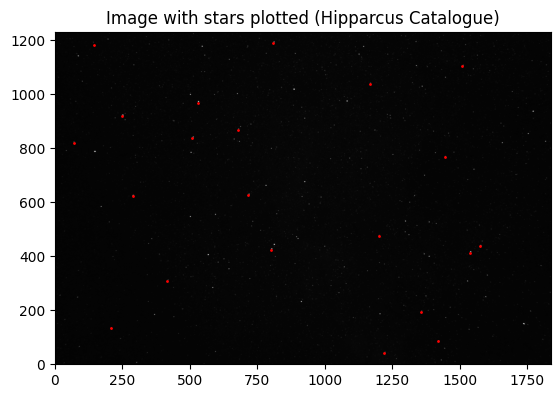

In [4]:
#Plot showing hipparcus visible stars plotted on top of image
plt.imshow(NB.getImageData(original = False), origin='lower', cmap = 'gray')
plt.scatter(visible_stars_hipparcus['x_pixels'], visible_stars_hipparcus['y_pixels'], s=1, color = 'red')
plt.title("Image with stars plotted (Hipparcus Catalogue)")
plt.show()

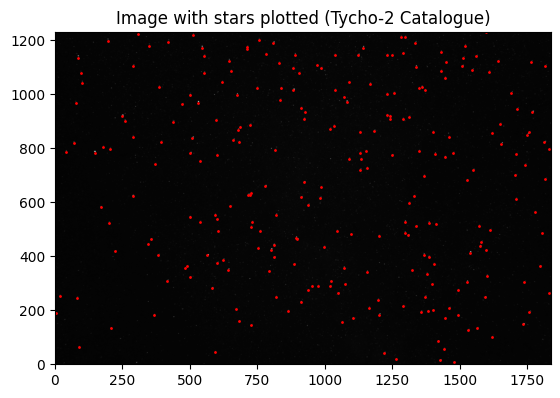

In [5]:
#Plot showing Tycho-2 visible stars plotted on top of image
plt.imshow(NB.getImageData(original = False), origin='lower', cmap = 'gray')
plt.scatter(visible_stars_tycho_2['x_pixels'], visible_stars_tycho_2['y_pixels'], s=1, color = 'red')
plt.title("Image with stars plotted (Tycho-2 Catalogue)")
plt.show()

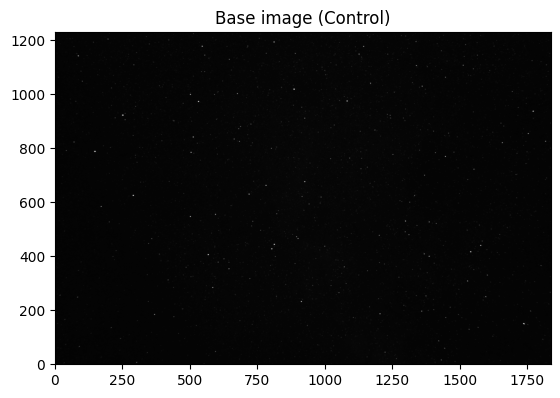

In [6]:
#Plot showing image
plt.imshow(NB.getImageData(original = False), origin='lower', cmap='gray')
plt.title("Base image (Control)")
plt.show()